In [65]:
# importing libraries and Setting Option

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics 

#Setting Options
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [2]:
player_list = pd.read_csv('player_set.csv')
player_list.head()

,Name,Age,OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,P. Cancar,19,47,52,Western Sydney Wanderers,259655,185.0,75.0,Right,49,CB,5,0.1,0.00070,0.08,137,23,17,44,33,20,134,22,26,24,28,34,260,62,57,42,42,57,239,34,67,58,57,23,178,42,49,29,28,30,39,140,41,51,48,57,15,15,9,9,9,1145,242,1,59,23,28,30,47,55
1,A. Januzaj,25,80,83,Real Sociedad,208330,185.0,76.0,Left,81,CAM,3,28.0,0.03700,60.90,350,82,77,42,79,70,392,86,80,70,74,82,390,80,76,80,77,77,341,74,61,71,58,77,291,41,36,78,76,60,73,75,30,23,22,55,15,10,11,12,7,1894,402,1,78,75,78,83,30,58
2,D. Sarmiento,17,63,83,Estudiantes de La Plata,253715,168.0,60.0,Right,63,LW,20,1.3,0.00075,3.30,271,55,61,41,55,59,286,70,57,47,47,65,370,78,75,81,48,88,245,69,54,39,33,50,249,38,35,54,60,62,58,102,41,27,34,45,7,12,7,9,10,1568,332,1,76,60,55,69,35,37
3,M. Thiaw,18,64,82,FC Schalke 04,256261,190.0,80.0,Right,66,CB,18,1.4,0.00200,3.30,248,37,43,72,60,36,236,45,38,44,57,52,293,60,66,50,57,60,300,50,76,65,74,35,265,56,63,40,42,64,49,191,62,65,64,51,10,6,15,11,9,1584,336,1,63,43,49,49,64,68
4,R. Jiménez,29,84,84,Wolverhampton Wanderers,204838,188.0,81.0,Right,84,ST,0,42.0,0.14000,79.80,405,73,84,85,81,82,368,84,75,51,75,83,380,72,82,75,83,68,402,83,75,86,84,74,388,81,53,84,78,92,81,121,53,38,30,55,7,11,13,14,10,2119,450,3,78,82,76,82,49,83


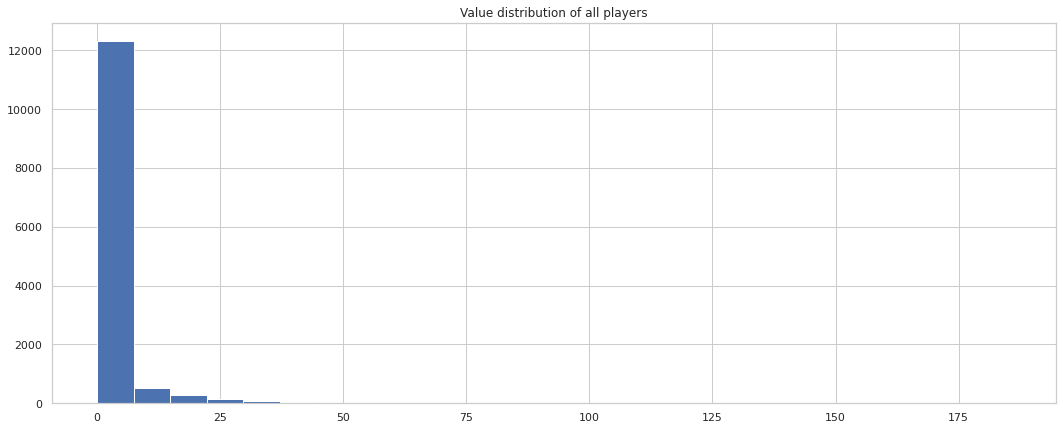

In [3]:
#Value Distribution of All Players
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=player_list)
plt.title('Value distribution of all players')
plt.show()

In [4]:
#Changing columns order
player_list = player_list[['Name', 'Value','Age', 'OVA', 'POT', 'Team & Contract', 'Height',
                           'Weight', 'foot', 'BOV', 'BP', 'Growth', 'Wage', 'Release Clause', 'Attacking', 'Crossing',
                           'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
                           'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
                           'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
                           'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
                           'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
                           'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
                           'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
                           'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
                           'Total Stats', 'Base Stats', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
                           'PHY']]
       
#View the correlations
corr_mat = player_list.corr()
corr_mat

,Value,Age,OVA,POT,Height,Weight,BOV,Growth,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY
Value,1.000000,0.101321,0.556721,0.543005,0.015398,0.048339,0.567937,-0.164990,0.804590,0.993191,0.267338,0.232485,0.213056,0.165123,0.306308,0.234841,0.280250,0.243415,0.257292,0.221932,0.292483,0.274787,0.251152,0.161522,0.168613,0.186347,0.502339,0.115014,0.307028,0.307264,0.146386,0.221849,0.151349,0.235627,0.284614,0.185736,0.155968,0.226103,0.340665,0.188004,0.404449,0.134159,0.159186,0.127070,0.109718,0.004285,0.003272,0.003552,0.004394,0.004716,0.005193,0.359005,0.479786,0.470751,0.218293,0.300246,0.413093,0.408386,0.178149,0.268624
Age,0.101321,1.000000,0.585641,-0.133519,0.115270,0.286562,0.531746,-0.869710,0.249733,0.084502,0.251089,0.208582,0.149576,0.243492,0.254254,0.227572,0.233435,0.108839,0.229898,0.264985,0.288490,0.191890,0.023496,-0.125261,-0.113978,0.023365,0.555980,-0.065018,0.397012,0.359337,0.258728,0.160077,0.421481,0.241856,0.336889,0.340460,0.252683,0.168998,0.285696,0.223896,0.482538,0.189137,0.239332,0.171103,0.148399,0.086915,0.083625,0.084323,0.082837,0.095486,0.082741,0.360745,0.482015,0.405620,-0.130027,0.330180,0.434043,0.295768,0.293635,0.513003
OVA,0.556721,0.585641,1.000000,0.627963,0.061664,0.184406,0.988227,-0.639528,0.591929,0.543393,0.480465,0.435414,0.338036,0.361588,0.542420,0.397147,0.491430,0.399123,0.444964,0.411063,0.530485,0.480661,0.358543,0.185929,0.200554,0.287513,0.880075,0.117978,0.613527,0.577875,0.323912,0.399157,0.423775,0.432475,0.543682,0.445310,0.358635,0.373512,0.540954,0.347155,0.745074,0.310275,0.364813,0.291040,0.259890,0.013326,0.011610,0.010887,0.008376,0.022768,0.012060,0.659084,0.861440,0.462435,0.239718,0.506417,0.723952,0.672838,0.409115,0.622744
POT,0.543005,-0.133519,0.627963,1.000000,0.001059,-0.015015,0.659574,0.196688,0.480466,0.544319,0.289754,0.263954,0.216984,0.177866,0.364316,0.232290,0.323469,0.310275,0.281870,0.223141,0.334769,0.338044,0.312636,0.228714,0.231039,0.245701,0.520017,0.150796,0.304330,0.340553,0.131666,0.218317,0.104728,0.247532,0.301861,0.199442,0.176211,0.232812,0.357414,0.194363,0.443390,0.172210,0.190298,0.165386,0.152144,-0.011208,-0.010796,-0.012344,-0.015497,-0.006169,-0.010680,0.397422,0.539186,0.296153,0.296776,0.300989,0.455542,0.498308,0.211824,0.245699
Height,0.015398,0.115270,0.061664,0.001059,1.000000,0.765410,0.046374,-0.076641,0.043674,0.014601,-0.333019,-0.460780,-0.352152,0.048033,-0.319635,-0.319702,-0.420229,-0.458087,-0.411336,-0.372775,-0.279503,-0.384322,-0.596514,-0.529777,-0.443010,-0.596784,0.023963,-0.759380,-0.111612,-0.144516,0.022919,-0.265001,0.540559,-0.355275,-0.278107,-0.014272,-0.024698,-0.414202,-0.331122,-0.301202,-0.118722,-0.046866,-0.041653,-0.044543,-0.051717,0.354352,0.350301,0.349752,0.347779,0.348596,0.351927,-0.323476,-0.076737,0.061271,-0.366043,-0.069747,-0.157300,-0.260591,0.102235,0.422626
Weight,0.048339,0.286562,0.184406,-0.015015,0.765410,1.000000,0.162481,-0.247155,0.090955,0.043648,-0.231643,-0.359732,-0.260143,0.095718,-0.226786,-0.222561,-0.317833,-0.371111,-0.312292,-0.267367,-0.195588,-0.291529,-0.497569,-0.470665,-0.391572,-0.514648,0.141240,-0.646774,0.029130,-0.024111,0.109367,-0.193150,0.641047,-0.241089,-0.168996,0.074793,0.009742,-0.313244,-0.236899,-0.200639,-0.008135,-0.020147,-0.003214,-0.022302,-0.033279,0.323499,0.319235,0.319301,0.316307,0.321300,0.320037,-0.197870,0.047193,0.129062,-0.326364,0.026676,-0.055708,-0.161500,0.128266,0.529721
BOV,0.567937,0.531746,0.988227,0.659574,0.046374,0.162481,1.000000,-0.593470,0.591916,0.5

In [5]:
player_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13488 entries, 0 to 13487
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              13488 non-null  object 
 1   Value             13488 non-null  float64
 2   Age               13488 non-null  int64  
 3   OVA               13488 non-null  int64  
 4   POT               13488 non-null  int64  
 5   Team & Contract   13488 non-null  object 
 6   Height            13488 non-null  float64
 7   Weight            13488 non-null  float64
 8   foot              13488 non-null  object 
 9   BOV               13488 non-null  int64  
 10  BP                13488 non-null  object 
 11  Growth            13488 non-null  int64  
 12  Wage              13488 non-null  float64
 13  Release Clause    13488 non-null  float64
 14  Attacking         13488 non-null  int64  
 15  Crossing          13488 non-null  int64  
 16  Finishing         13488 non-null  int64 

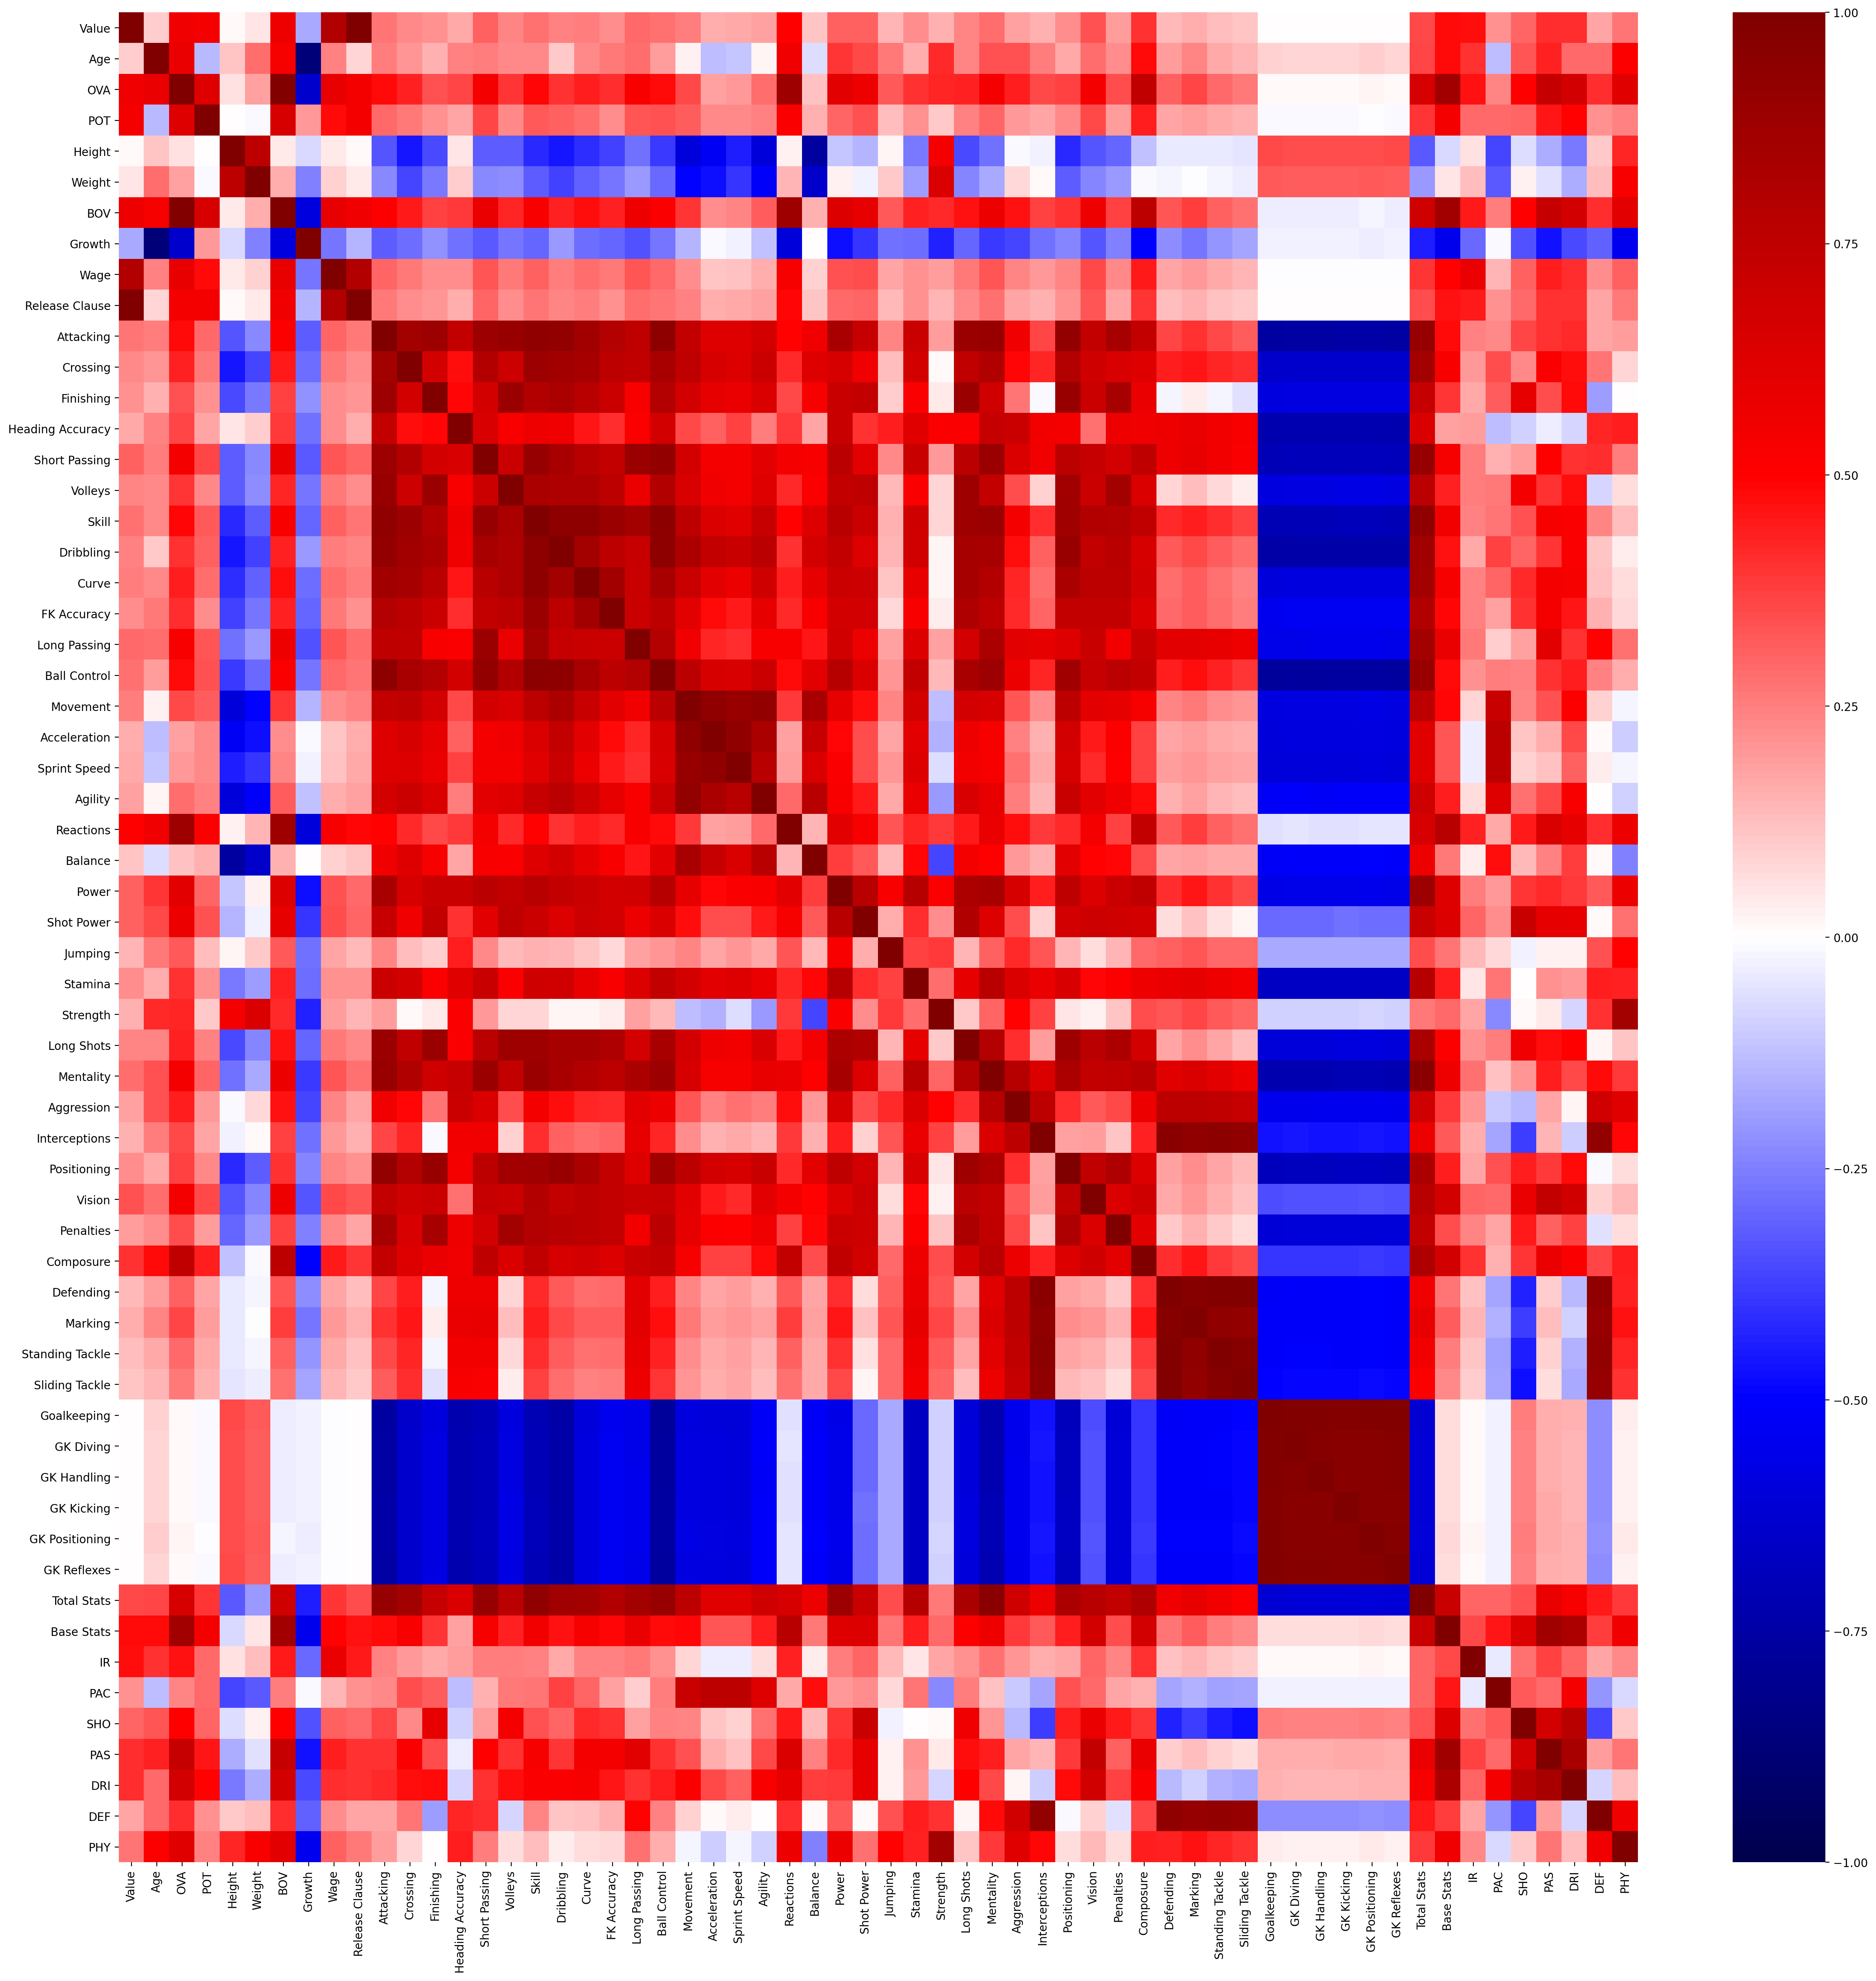

In [6]:
# Heatmap of Correlation Matr

plt.figure(figsize=(30,30),dpi=200),
plt.style.use('default')
sns.heatmap(player_list.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);
plt.show()

# OLS Model

In [7]:
# Slice data into feature and target

X= player_list.drop(columns=["Value","Name","Team & Contract","foot","BP"])
y= player_list.loc[:,"Value"]

In [8]:
# fit model with target as player market value 
player_model = sm.OLS(y, X, data=player_list)

results = player_model.fit()

print(results.summary())



                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          2.528e+04
Date:                Tue, 01 Dec 2020   Prob (F-statistic):                        0.00
Time:                        18:21:36   Log-Likelihood:                         -17876.
No. Observations:               13488   AIC:                                  3.585e+04
Df Residuals:                   13439   BIC:                                  3.622e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [9]:
#Get various attributes and methods for results
#dir(results)
print('Parameters: ', results.params)
print('Standard errors: ', results.bse)
print('Predicted values: ', results.predict())

Parameters:  Age                -0.030893
OVA                 0.030353
POT                 0.001068
Height             -0.003782
Weight              0.003534
BOV                -0.026420
Growth             -0.029285
Wage                3.947491
Release Clause      0.498667
Attacking           0.001292
Crossing           -0.004005
Finishing           0.005436
Heading Accuracy   -0.000967
Short Passing      -0.003142
Volleys             0.003970
Skill              -0.000497
Dribbling           0.001189
Curve              -0.003172
FK Accuracy         0.002543
Long Passing        0.001905
Ball Control       -0.002962
Movement           -0.001961
Acceleration       -0.005003
Sprint Speed       -0.006260
Agility             0.001343
Reactions           0.003576
Balance             0.004382
Power               0.002643
Shot Power         -0.000916
Jumping            -0.000639
Stamina             0.005476
Strength            0.000340
Long Shots         -0.001618
Mentality           0.000258
A

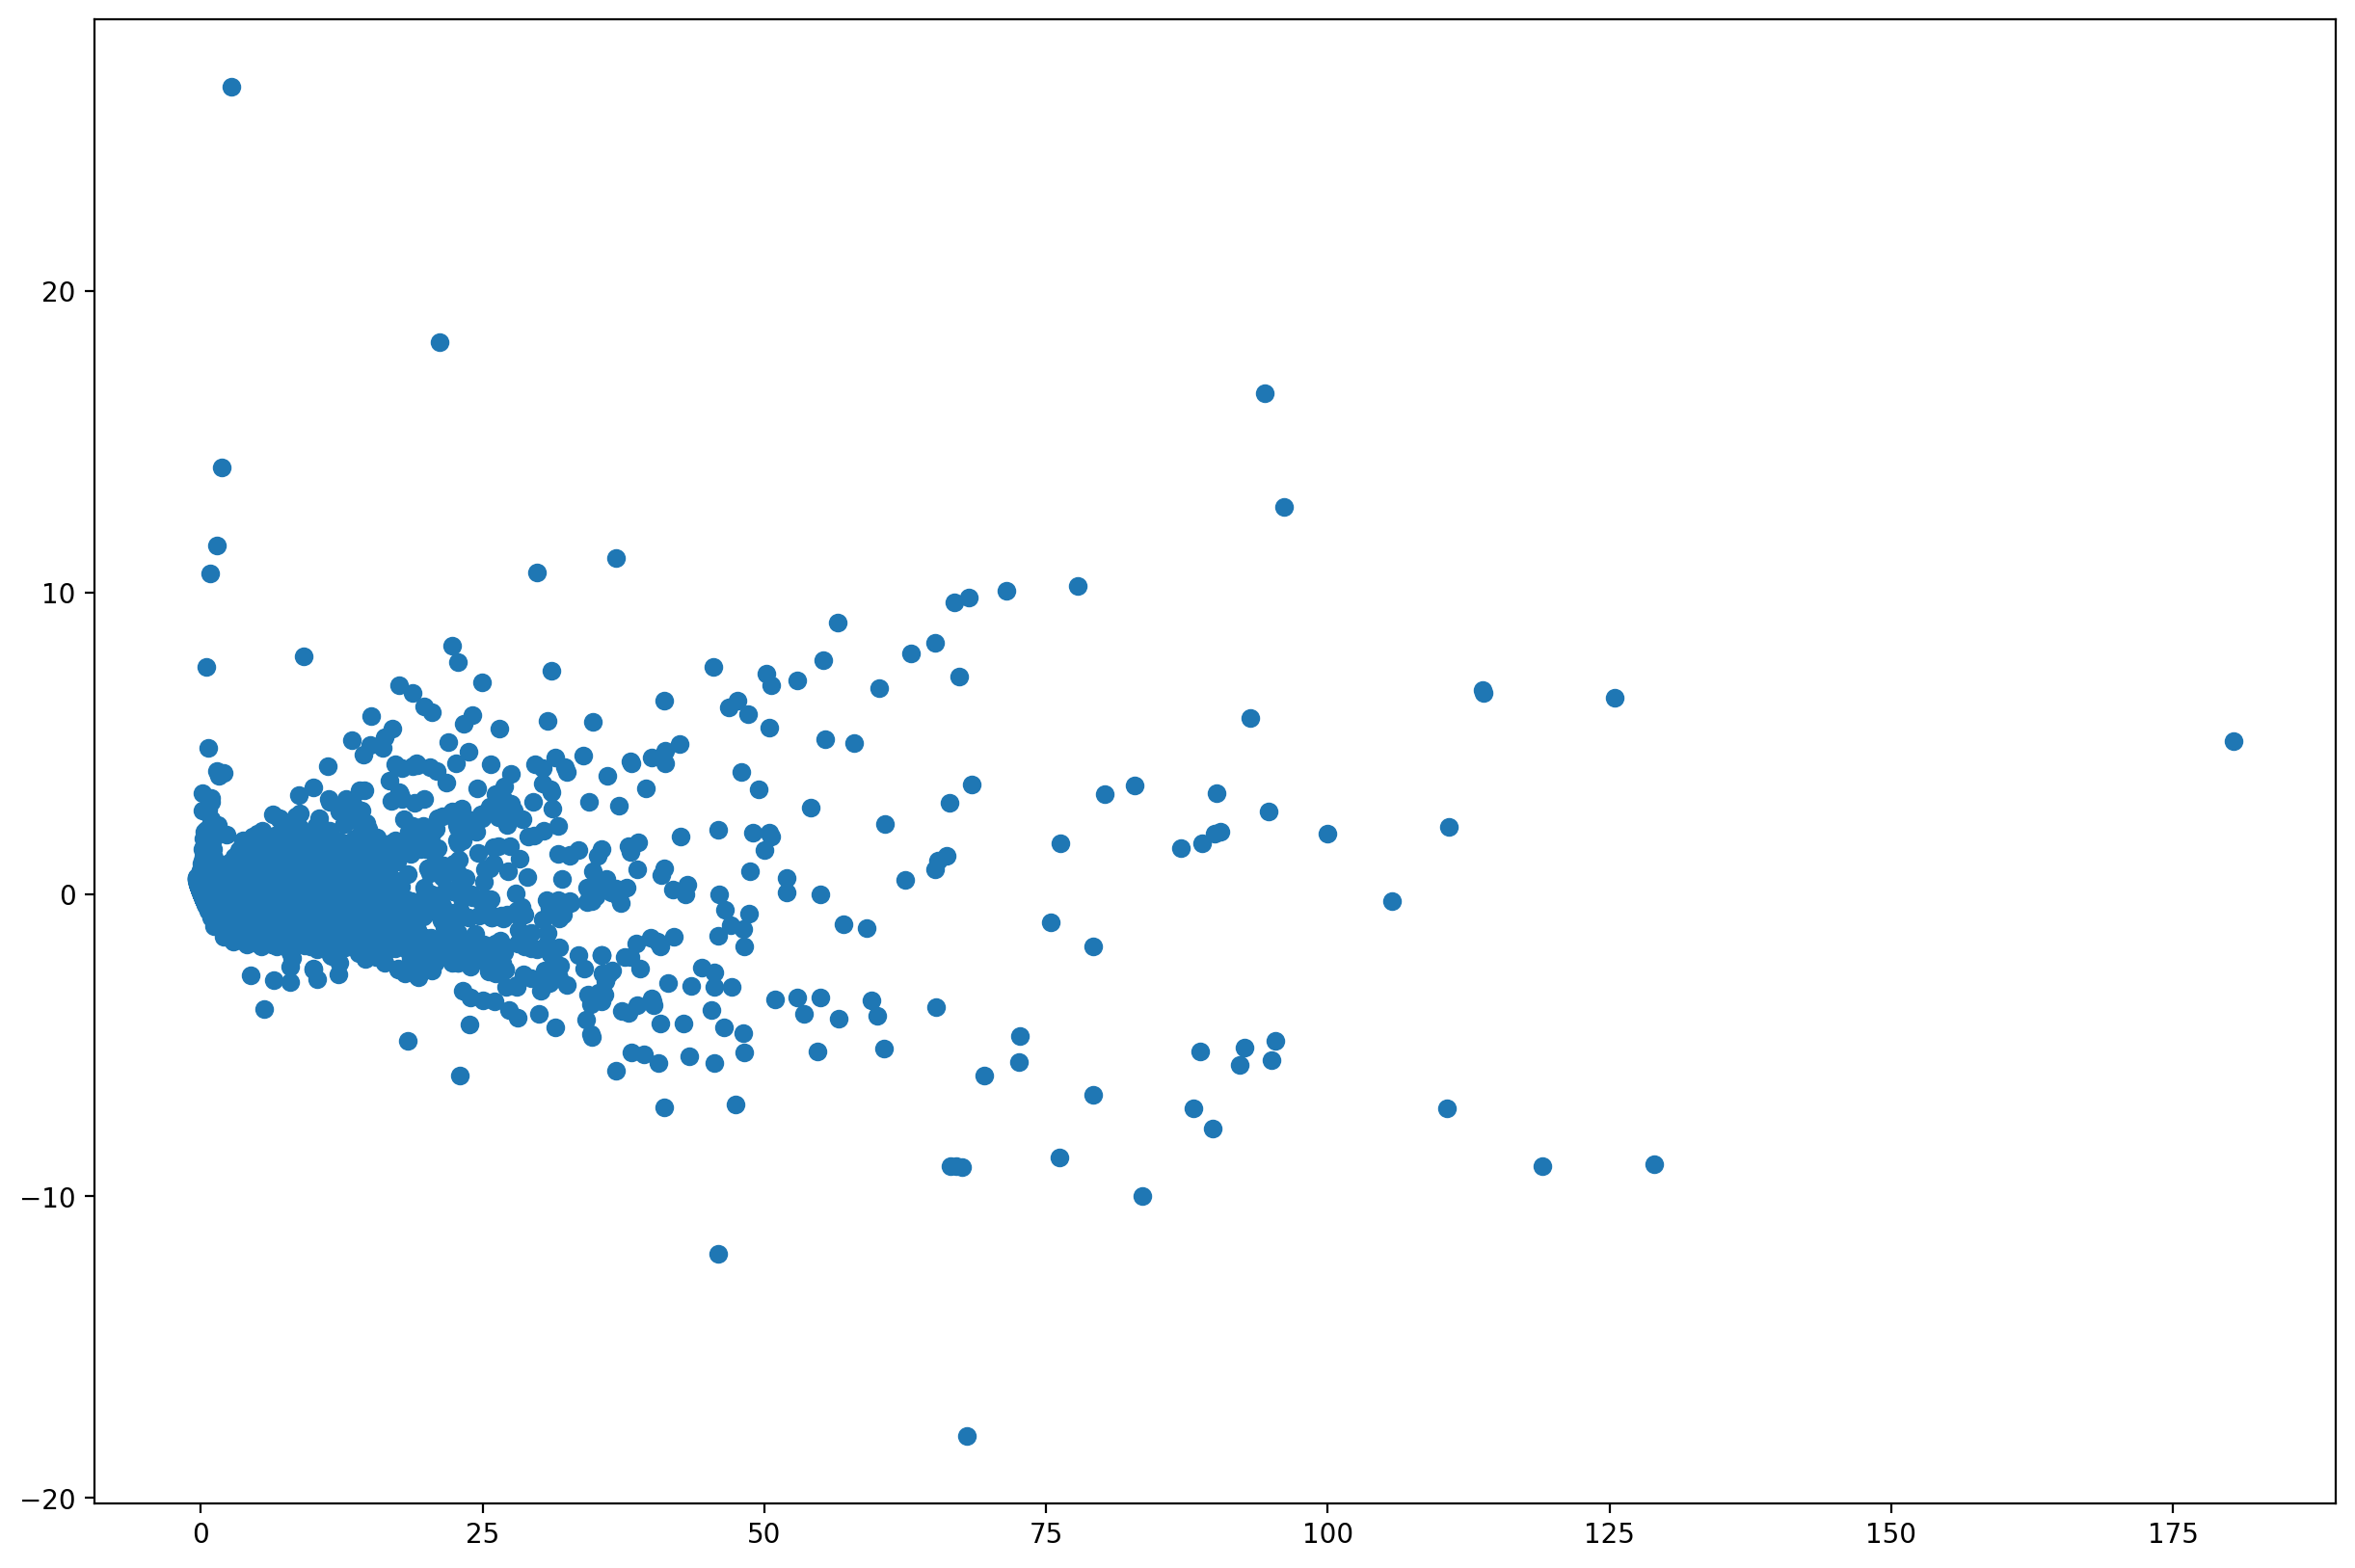

In [10]:
#Plotting Residuals

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
plt.scatter(results.predict(), results.resid);

<AxesSubplot:xlabel='OVA', ylabel='Value'>

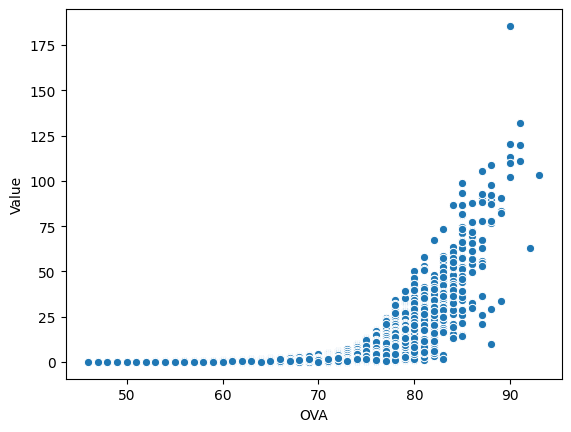

In [11]:
sns.scatterplot(x="OVA",y="Value", data=player_list)

In [42]:
#Top 20 correlated columns
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=False).head(16)

,Value
Value,1.000000
Release Clause,0.993191
Wage,0.804590
BOV,0.567937
OVA,0.556721
POT,0.543005
Reactions,0.502339
Base Stats,0.479786
IR,0.470751
PAS,0.413093


In [13]:
#Least correlated columns
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=True).head(10)

,Value
Growth,-0.164990
GK Diving,0.003272
GK Handling,0.003552
Goalkeeping,0.004285
GK Kicking,0.004394
GK Positioning,0.004716
GK Reflexes,0.005193
Height,0.015398
Weight,0.048339
Age,0.101321


# OLS Model with highly correlated features

In [43]:


#Model based on most correlated 15 columns

X1= player_list.loc[:,["Release Clause","Wage","BOV","OVA","POT","Reactions", "Base Stats","IR",
                     "PAS","DRI","Composure","Total Stats", "Vision","Shot Power", "Power"]]
y1= player_list.loc[:,"Value"]

player_model1 = sm.OLS(y1, X1, data=player_list)

results1 = player_model1.fit()

print(results1.summary());



                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          8.116e+04
Date:                Tue, 01 Dec 2020   Prob (F-statistic):                        0.00
Time:                        18:34:30   Log-Likelihood:                         -18008.
No. Observations:               13488   AIC:                                  3.605e+04
Df Residuals:                   13473   BIC:                                  3.616e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [44]:
#Prediction on all data and calculate difference between tha actual value and predicted value
y_pred = results.predict()
df = pd.DataFrame({'Name':player_list.Name,'Actual': y1, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
df_under

,Actual,Predicted,Difference
Name,,,
Vinícius Jr.,50.0,67.94,-17.94
Trincão,34.0,45.93,-11.93
F. Valverde,73.5,83.50,-10.00
M. Ødegaard,58.5,67.55,-9.05
M. ter Stegen,110.0,119.01,-9.01
O. Dembélé,57.5,66.51,-9.01
Cucurella,58.0,67.00,-9.00
J. Oblak,120.0,128.95,-8.95
João Félix,67.5,76.22,-8.72


# Linear regression model with all features

In [45]:
#what coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(X,y)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False).T

,Volleys,Finishing,Heading Accuracy,Short Passing,Crossing,POT,Stamina,Strength,Jumping,Long Shots,Shot Power,Defending,Dribbling,FK Accuracy,Long Passing,Ball Control,Curve,Balance,Reactions,Agility,Sprint Speed,Acceleration,PAC,DEF,PAS,SHO,PHY,DRI,Goalkeeping,Mentality,Positioning,Vision,Aggression,Penalties,Interceptions,Wage,Release Clause,IR,Weight,Composure,Height,Age,BOV,Total Stats,GK Positioning,GK Kicking,GK Reflexes,GK Handling,GK Diving,Movement,Base Stats,Skill,Standing Tackle,Sliding Tackle,Marking,Power,OVA,Growth,Attacking
Coefficient,1.073378e+11,1.073378e+11,1.073378e+11,1.073378e+11,1.073378e+11,8.662479e+10,8.155383e+10,8.155383e+10,8.155383e+10,8.155383e+10,8.155383e+10,6.675011e+10,6.376882e+10,6.376882e+10,6.376882e+10,6.376882e+10,6.376882e+10,5.231944e+10,5.231944e+10,5.231944e+10,5.231944e+10,5.231944e+10,4.945279e+10,4.945279e+10,4.945279e+10,4.945279e+10,4.945279e+10,4.945279e+10,3.193387e+10,9.239504e+09,4.002639e+09,4.002639e+09,4.002639e+09,4.002639e+09,4.002639e+09,3.978442,0.499211,0.46208,0.004435,0.001617,-0.002914,-0.02827,-0.039555,-1.324214e+10,-1.869172e+10,-1.869172e+10,-1.869172e+10,-1.869172e+10,-1.869172e+10,-3.907729e+10,-4.945279e+10,-5.052668e+10,-5.350797e+10,-5.350797e+10,-5.350797e+10,-6.831169e+10,-8.662479e+10,-8.662479e+10,-9.409568e+10


In [46]:
#Prediction on all data and calculate difference between tha actual value and predicted value
y_pred = regressor.predict(X)
df = pd.DataFrame({'Name':player_list.Name,'Actual': y, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
df_under

,Actual,Predicted,Difference
Name,,,
Vinícius Jr.,50.0,67.99,-17.99
Trincão,34.0,46.06,-12.06
F. Valverde,73.5,83.71,-10.21
Cucurella,58.0,67.17,-9.17
J. Oblak,120.0,129.16,-9.16
M. ter Stegen,110.0,119.03,-9.03
M. Ødegaard,58.5,67.50,-9.00
O. Dembélé,57.5,66.44,-8.94
João Félix,67.5,76.36,-8.86


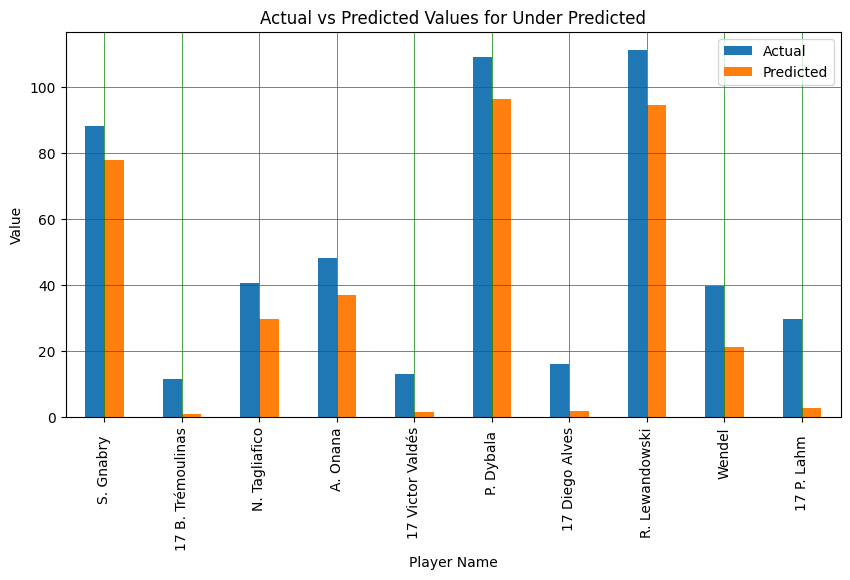

In [47]:
#Plot the comparision of Actual and Predicted Values for Under Predicted
df_over[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Under Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

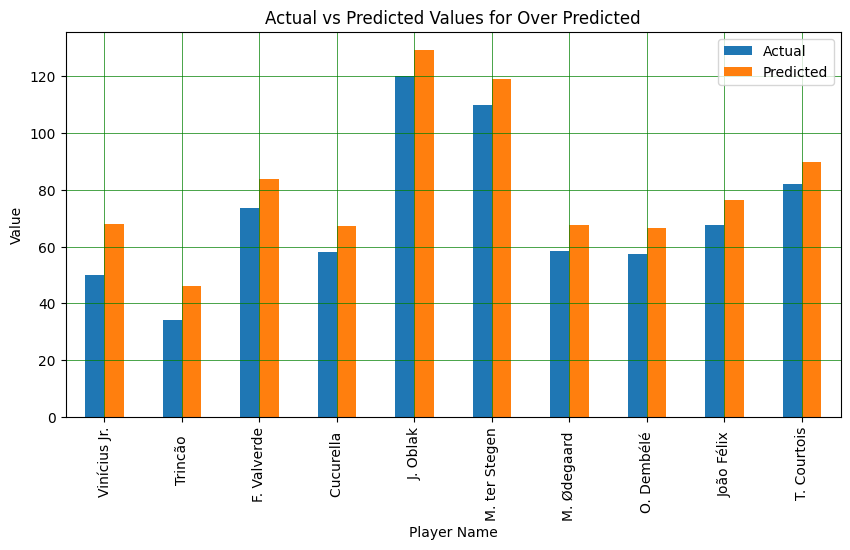

In [48]:
#Plot the comparision of Actual and Predicted Values for Over Predicted

df_under[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Over Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

# Linear regression model with highly correlated features

In [49]:
#what coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(X1,y1)
coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False).T

,Wage,Release Clause,IR,OVA,Vision,DRI,Power,Base Stats,Total Stats,Reactions,Composure,Shot Power,PAS,BOV,POT
Coefficient,3.902694,0.500689,0.451822,0.020605,0.002993,0.002522,0.001899,0.001885,-0.000194,-0.000578,-0.002189,-0.003601,-0.004396,-0.008623,-0.008827


In [61]:
#Prediction on all data and calculate difference between tha actual value and predicted value
y_pred = regressor.predict(X1)
df = pd.DataFrame({'Name':player_list.Name,'Actual': y1, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
df_under

,Actual,Predicted,Difference
Name,,,
Vinícius Jr.,50.0,68.02,-18.02
Trincão,34.0,46.13,-12.13
F. Valverde,73.5,83.64,-10.14
J. Oblak,120.0,129.48,-9.48
M. ter Stegen,110.0,119.31,-9.31
Cucurella,58.0,67.16,-9.16
O. Dembélé,57.5,66.53,-9.03
M. Ødegaard,58.5,67.52,-9.02
João Félix,67.5,76.48,-8.98


In [66]:
#Calculating MAE, MSE, RMSE and R^2 values of our model
print('Mean Absolute Error:', metrics.mean_absolute_error(y1, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1, y_pred)))
print('Linear Regression R^2:',regressor.score(X1,y1))

Mean Absolute Error: 0.36610793865698366
Mean Squared Error: 0.8405857835645597
Root Mean Squared Error: 0.9168346544304266
Linear Regression R^2: 0.9874277490363745


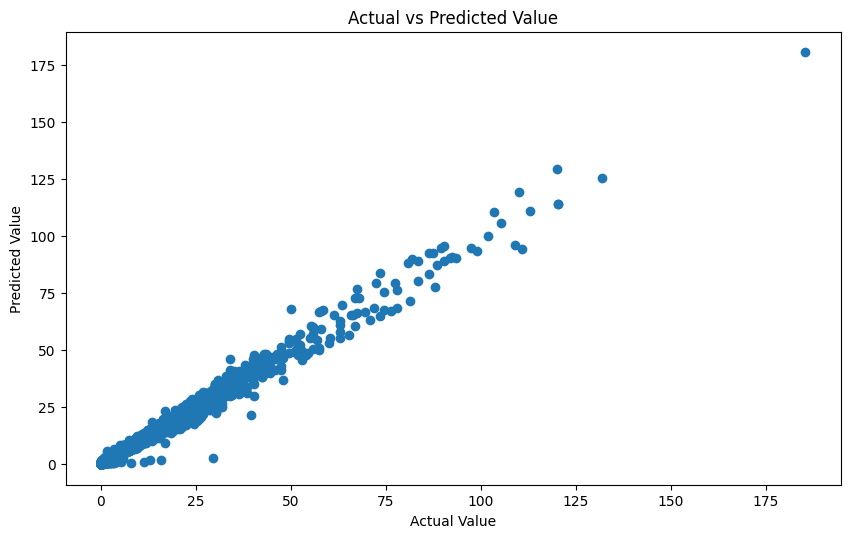

In [67]:
# Actual Values vs Predicted Values
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(y1, y_pred)
plt.title ("Actual vs Predicted Value")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [70]:
#Model based on most selected columns

X1= player_list.loc[:,['OVA','Age','IR','Growth','Release Clause']]
y1= player_list.loc[:,"Value"]

player_model1 = sm.OLS(y1, X1, data=player_list)

results1 = player_model1.fit()

print(results1.summary());

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          2.451e+05
Date:                Tue, 01 Dec 2020   Prob (F-statistic):                        0.00
Time:                        18:53:01   Log-Likelihood:                         -17969.
No. Observations:               13488   AIC:                                  3.595e+04
Df Residuals:                   13483   BIC:                                  3.599e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [72]:
#Correlation matrics of selected features
player_list_selected_features= player_list[['Value','OVA','Age','IR','Growth','Release Clause','Height','Weight']]

player_list_selected_features.corr()

,Value,OVA,Age,IR,Growth,Release Clause,Height,Weight
Value,1.000000,0.556721,0.101321,0.470751,-0.164990,0.993191,0.015398,0.048339
OVA,0.556721,1.000000,0.585641,0.462435,-0.639528,0.543393,0.061664,0.184406
Age,0.101321,0.585641,1.000000,0.405620,-0.869710,0.084502,0.115270,0.286562
IR,0.470751,0.462435,0.405620,1.000000,-0.290049,0.450018,0.061271,0.129062
Growth,-0.164990,-0.639528,-0.869710,-0.290049,1.000000,-0.146900,-0.076641,-0.247155
Release Clause,0.993191,0.543393,0.084502,0.450018,-0.146900,1.000000,0.014601,0.043648
Height,0.015398,0.061664,0.115270,0.061271,-0.076641,0.014601,1.000000,0.765410
Weight,0.048339,0.184406,0.286562,0.129062,-0.247155,0.043648,0.765410,1.000000


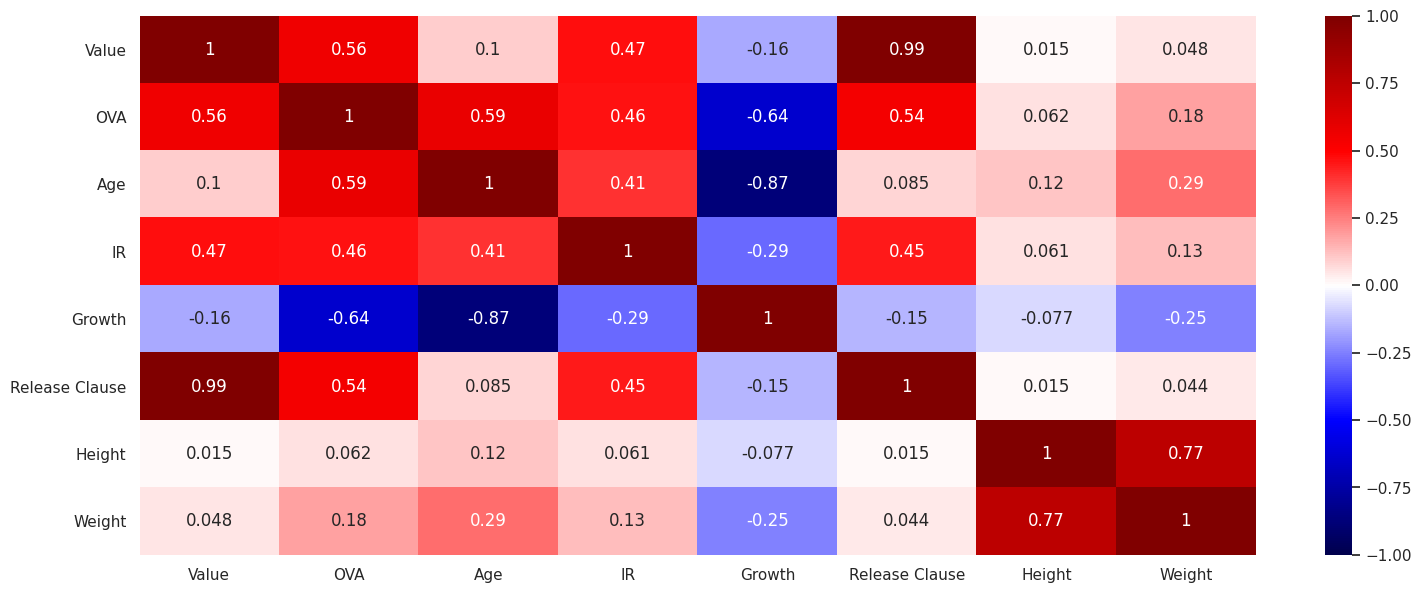

In [73]:
#Heatmap of correlation values
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
sns.heatmap(player_list_selected_features.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0); 
plt.show()

In [74]:
#Split data into train, test and validation (%60 - %20)

X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X1,y1, test_size=.25, random_state=10)

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_val)
mse = np.mean((pred-y_val)**2)

print(lr.score(X_test,y_test))
print(mse)
print(lr.coef_)

0.9923399296818467
0.6594443496015634
[ 0.01305634 -0.03338154  0.56843479 -0.03271949  0.50170777]


In [75]:
coeff = pd.DataFrame(X_train.columns)

coeff['CoefficientEstimate'] = lr.coef_

coeff.sort_values("CoefficientEstimate")

,0,CoefficientEstimate
1,Age,-0.033382
3,Growth,-0.032719
0,OVA,0.013056
4,Release Clause,0.501708
2,IR,0.568435
